>#  **<center>TRANSJAKARTA<center>**
---

# **Latar Belakang**

1. Angka pertumbuhan kendaraan seperti motor dan mobil meningkat 2020 - 2022. 
    - Untuk mobil di tahun 2021 sebesar 5.32 % dan di 2022 meningkat menjadi 6.25%
    - Untuk motor di tahun 2021 sebesar 3.53 % dan di 2022 meningkat menjadi 3.55%
    Tak tanggung-tanggung penambahan kendaraan tiap tahunnya hampir menyentuh 1 juta unit
    Penambahan kendaraan roda dua maupun roda empat menjadi salah satu faktor penyebab kemacetan di DKI Jakarta.sementara jumlah ruas jalan yang ada hanya sebegitu adanya.
    Sumber : BPS DKI Jakarta (Korlantas POLRI)

2. Transjakarta adalah sistem transportasi Bus Rapid Transit (BRT) yang beroperasi sejak tahun 2004 di Jakarta, Indonesia. Transjakarta dirancang sebagai moda transportasi massal pendukung aktivitas ibu kota yang sangat padat. TransJakarta dirancang sebagai moda transportasi massal pendukung aktivitas ibukota yang sangat padat. Dengan jalur lintasan terpanjang di dunia (251.2 km), serta memiliki 287 halte yang tersebar dalam 13 koridor, Transjakarta yang awalnya beroperasi mulai Pkl. 05.00 – Pkl. 22.00 WIB, kini beroperasi 24 jam. Hal tersebut berkenaan dengan semakin tingginya minat masyarakat untuk menggunakan moda transportasi TransJakarta. Data Badan Pusat Statistik (BPS) menyebutkan sepanjang Januari 2024, jumlah penumpang Transjakarta mencapai 30.934.491 orang. Angka ini meningkat 6,83% dibandingkan Desember 2023 dan mengalami peningkatan 4,66% dibandingkan Januari 2023
  

3. Minat masyarakat untuk menggunakan transportasi TransJakarta dikarenakan tarif yang relatif murah jika dibandingkan dengan beberapa pilihan moda transportasi lainnya seperti MRT, LRT serta moda transportasi berbasis online. Namun, sejak beroperasional pada tahun 2004, banyak kekurangan dalam sistem pelayanan TransJakarta, seperti kurangnya armada untuk menampung penumpang yang menyebabkan over capacity serta masih terdapat koridor yang belum steril dari kendaraan pribadi yang menyebakan waktu perjalanan tidak optimal.

# **Problems & Goals**

Dalam konteks pengembangan sistem transportasi Transjakarta, ada beberapa masalah dan tujuan yang ingin dipecahkan. Salah satu fokus utama adalah meningkatkan efektivitas, efisiensi, dan profitabilitas operasional Transjakarta. Untuk mencapai tujuan ini, akan dijelajahi berbagai aspek yang dapat menjadi temuan, termasuk aspek-aspek berikut:


**Pengguna Transjakarta**: Mengidentifikasi profil pengguna Transjakarta, termasuk data berdasarkan jenis kelamin dan kelompok usia serta metode pembayarannya. Informasi ini akan membantu *Transjakarta* memahami perilaku pengguna dan merancang strategi pemasaran yang lebih efektif.

**Pembayaran**: Mengidentifikasi metode pembayaran yang paling banyak digunakan sehingga dari informasi dapat membantu untuk peningkatan profit perusahaan

**Tren penggunaan Transjakarta**: Analisis penggunaan transjakarta berdasarkan bulan, hari dan jamnya. Hal ini akan membantu *Transjakarta* memahami banyaknya pengguna di waktu apa saja 

**Koridor**: Analisis koridor yang paling sering digunakan dan pola perjalanan pengguna untuk mengevaluasi kinerja koridor. Dengan pemahaman yang lebih baik tentang preferensi pengguna, *Transjakarta* dapat mengoptimalkan layanan di koridor yang paling diminati.

Dari 4 hal yang disebutkan, diharapkan bisa membantu **stakeholders** terkait yaitu **Divisi Operasional dan Pelayanan & Bisnis Transjakarta**

# **Data Understanding**

Hal pertama yang dilakukan sebelum mengolah dan menganalisi data ialah **pemahaman dari dataset itu sendiri**. Disini saya akan melihat dataset Transjakarta dan memahami semua informasi yang didapat dari dataset ini.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


Dataset ini berisi data Transjakarta di bulan **April 2023**. Setelah melihat dan memahami informasi dari dataset ini, saya menemukan informasi apa saja yang saya miliki yang dilihat dari kolom yang ada, dataset ini memiliki 22 kolom yang berisikan informasi, antara lain:

| Kolom             | Deskripsi                                      |
|-------------------|------------------------------------------------|
| `transID`           | Unik ID transaksi setiap transaksi             |
| `payCardID`         | ID kartu yang digunakan pengguna sebagai alat bayar |
| `payCardBank`       | Jenis kartu yang digunakan pengguna Transjakarta |
| `payCardName`       | Nama pengguna yang tertanam dalam kartu       |
| `payCardSex`        | Jenis kelamin pengguna yang tertanam dalam kartu |
| `payCardBirthDate`  | Tahun lahir pengguna kartu                     |
| `corridorID`        | Kode jenis rute                                |
| `corridorName`      | Nama rute beserta start dan finish-nya         |
| `direction`         | Terdapat 0 dan 1 dimana 0 adalah arah pergi dan 1 arah balik rute |
| `tapInStops`        | ID halte pengguna tap masuk (Entrance)         |
| `tapInStopsName`    | Nama halte pengguna tap masuk                   |
| `tapInStopsLat`     | Koordinat latitude halte pengguna tap masuk    |
| `tapInStopsLon`     | Koordinat longitude halte pengguna tap masuk   |
| `stopStartSeq`      | Menunjukkan pemberhentian keberapa berdasarkan direction |
| `tapInTime`         | Waktu pengguna tap masuk berupa tanggal dan jam |
| `tapOutStops`       | ID halte pengguna tap keluar (Exit)            |
| `tapOutStopsName`   | Nama halte pengguna tap keluar                  |
| `tapOutStopsLat`    | Koordinat latitude halte pengguna tap keluar   |
| `tapOutStopsLon`    | Koordinat longitude halte pengguna tap keluar  |
| `stopEndSeq`        | Menunjukkan pemberhentian keberapa berdasarkan direction |
| `tapOutTime`        | Waktu pengguna tap keluar berupa tanggal dan jam |
| `payAmount`         | Harga yang dibayar oleh pengguna               |

In [97]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


Deskripsi :
- Data set ini terdiri dari 37900 baris
- Rata-rata usia pengguna transjakarta di tahun kelahiran 1990 yang berarti berusia 33 tahun, sedankan pengguna tertua dikelahiran 1946 dan yang paling muda di kelahiran 2012
- Pembayaran transjakarta paling kecil 0 rupiah, sedangkan dominan nya adalah 3500 rupiah dan yang paling mahal yaitu 20000
- terdapat 6 Kartu bank yang digunakan untuk metode pembayaran dan yang banyak digunakan adalah dki
- terdapat 2 gender laki-laki dan perempuan
- Corridor yang paling banyak digunakan adalah 1T (Cibubur - Balaikota)
- Untuk halte yang banyak digunakan berdasarkan tap in adalah penjaringan 
- Untuk halte yang banyak digunakan berdasarkan tap out adalah bkl


In [98]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, kita bisa melihat bahwa:
* dataset Transjakarta terdiri dari 37899 baris data dan 22 field.
* beberapa field memiliki nilai missing value yang akan di handling pada tahapan selanjutnya. missing value pada setiap field diwakili dengan data **nan**, berikut field dengan missing value yakni: <br>
    - `corridorID`, 
    - `corridorName`, 
    - `tapInStops`, 
    - `tapOutStops`, 
    - `tapOutStopsName`, 
    - `tapOutStopsLat`,  
    - `tapOutStopsLon`,
    -  `stopEndSeq`, 
    - `tapOutTime` dan 
    - `payAmount`. <br>
* field `payCardID` berisikan ID unik untuk setiap pelanggan. Dari penjelasannya, field ini seharusnya berisikan data object namun pada informasi diatas memiliki data tipe int64.
* field `tapInTime` dan `tapOutTime` memiliki data tipe object. Dari penjelasannya, field ini seharusnya berisikan data Date and Time. 
* data pada field `tapInTime` dan `tapOutTime` akan dibuatkan field baru berdasarkan hour dan day untuk memudahkan analisis.
* field `direction` memiliki 2 unique value yakni 0 dan 1.<br> 
  dari penjelasannya value data dapat diubah yaitu 0 untuk Go, 1 untuk Back.


# **Data Cleaning**
---

Hal yang perlu dilakukan berikutnya ialah **Data Cleaning**. Proses ini bertujuan untuk mengetahui apakah dalam data ini terdapat *missing value, duplikasi, ataupun anomali* demi efektifitas analisis data yang seharusnya.

In [99]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

## Duplikat

In [100]:
# Cek Duplikasi Data
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("Duplicated rows:")
    print(duplicates)
else:
    print("No duplicated rows found.")

No duplicated rows found.


Setelah dilakukan pengecekan duplikasi data, dataset ini tidak memiliki data yang sama atau duplikat.

## Missing Value

In [101]:
# Cek Missing Value
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [102]:
# Menghitung persentase missing values
pd.DataFrame(df.isna().sum()/df.shape[0]*100, columns=['null_pct']).query('null_pct>0')

,null_pct
corridorID,3.316623
corridorName,5.092348
tapInStops,3.200528
tapOutStops,6.039578
tapOutStopsName,3.546174
tapOutStopsLat,3.546174
tapOutStopsLon,3.546174
stopEndSeq,3.546174
tapOutTime,3.546174
payAmount,2.656992


Ada 10 kolom yang terdapat *missing value*. Ada 5 kolom dengan jumlah *missing value* yang sama yaitu, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`.

<Axes: >

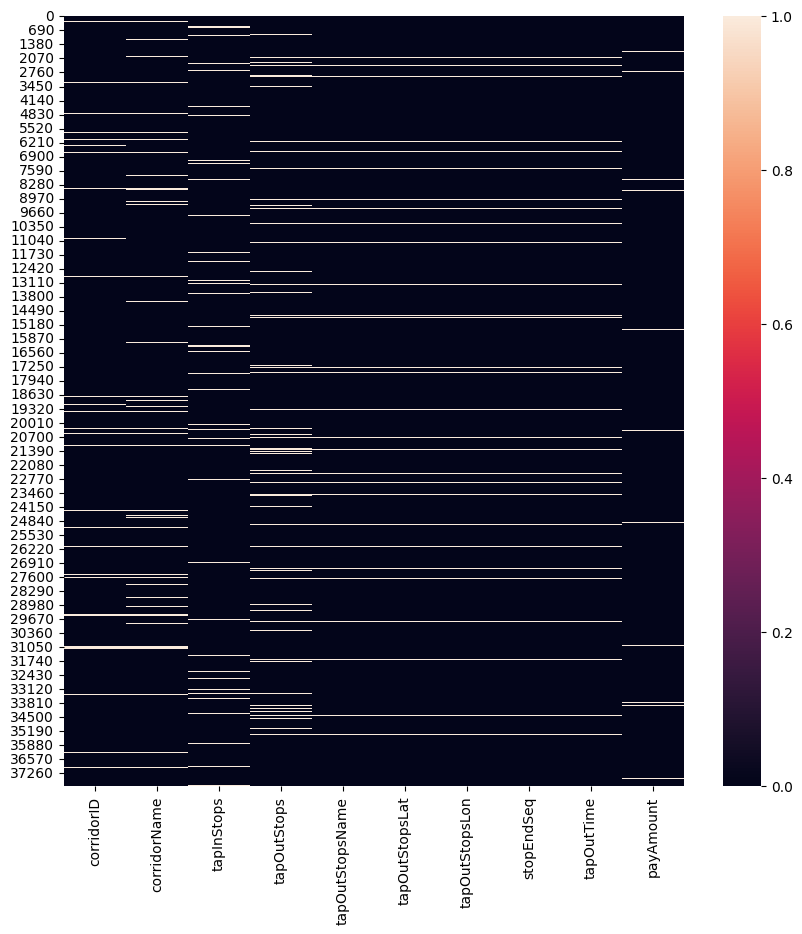

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime', 'payAmount' ]].isna())

Secara garis besar:  
* missing value di field `tapOutStops` dan `corridorName `memiliki proporsi yang cukup tinggi yakni >= 5% <br>
* missing value di field `corridorID` dan `corridorName` memiliki sebaran yang terlihat berkaitan. dapat dilihat dari garisnya berhubungan. <br>
* missing value di field `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`  dan `tapOutTime ` memiliki sebaran yang terlihat berkaitan dengan persentase nilai missing value yang sama yakni 3.5 % <br>
* missing value pada field payAmount memiliki sebaran yang tidak berkaitan dengan data yang lain.

In [104]:
# Melihat Missing Value di tiap baris/kolom
missing_values = df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']].isna()
rows_with_missing_values = df[missing_values.any(axis=1)]
rows_with_missing_values


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,...,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,...,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37882,YMCL988A7J02QF,180074952289665,emoney,Asmadi Setiawan,F,1971,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B01732P,...,106.86825,11,2023-04-30 08:41:09,B01169P,Jln. Jatinegara Timur IV,-6.222457,106.86816,13.0,2023-04-30 10:07:19,NaN
37885,KUXY021D6I25YN,30169751274025,bni,Prasetya Wasita,M,1986,3B,NaN,1.0,B04610P,...,106.72736,2,2023-04-08 10:46:06,B00192P,BSI Cengkareng,-6.147973,106.72781,3.0,2023-04-08 13:06:42,0.0
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,...,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


Setelah melihat semua *missing value*nya, ada kolom yang dapat diisi *missing value*nya dan ada juga kolom yang tidak dapat diisi.

#### `corridorID` dan `corridorName`
Dari analisis di atas, kita sudah tau bahwa *missing value* pada field `corridorID` dan `corridorName` saling berkaitan. Maka, kita akan memutuskan cara pengisian kedua kolom ini secara bersamaan.  

In [105]:
# jumlah missing value di kolom 'corridorID' dan 'corridorName'
df[['corridorID', 'corridorName']].isna().sum()

corridorID      1257
corridorName    1930
dtype: int64

Terdapat 1.257 data kosong pada field `corridorID` dan 1930 pada field `corridorName`.
Pertama, kita akan coba melihat, apakah data-data kosong pada field `corridorID` dan `corridorName` bisa saling mengisi? Pada tahapan ini akan coba dilakukan teknik maping berdasarkan pemetaan data yang sudah ada. <br>
Hal ini memungkinkan untuk melakukan transformasi pada data dengan mengganti nilai missing value yang ada dalam field dengan nilai lain yang sesuai dengan pemetaan yang telah didefinisikan.

### Mengisi missing value pada field corridorID berdasarkan corridorName yang sesuai <br>
Tindakan ini dilakukan karena masing-masing data pada field `corridorID` secara eksklusif mewakili satu `corridorName`.

Source: <br>
[Daftar Koridor Transjakarta](https://transjakarta.co.id/peta-rute/)

In [106]:
# Memastikan kolom yang kosong diwakili oleh nan
df['corridorID'].fillna(np.nan, inplace=True)

# Membuat pemetaan antara corridorName dan corridorID yang tidak kosong
mapping = df[df['corridorID'].notnull()].groupby('corridorName')['corridorID'].unique().apply(lambda x: x[0])

# Mengisi nilai yang hilang di corridorID berdasarkan corridorName yang sesuai
df['corridorID'].fillna(df['corridorName'].map(mapping), inplace=True)

In [107]:
df['corridorID'].isna().sum()

1125

Dengan menggunakan field `corridorName`, dapat disimpulkan bahwa hanya terisi 132 dari total 1257 nilai yang hilang pada field `corridorID`. Kondisi ini terjadi karena field `corridorName` juga memiliki nilai yang hilang pada baris yang bersesuaian dengan `corridorID`. <br>

### Mengisi missing value pada field `corridorID` berdasarkan `tapInStopsLat` dan `tapInStopLon` <br>
Tindakan ini dilakukan karena berdasarkan domain knowledge koordinat tersebut dapat memberikan penjelasan terkait posisi geografis dari setiap lokasi koridor (field `corridorID`). Dan setiap koordinat adalah unique, sehingga satu `corridorID` hanya memiliki satu koordinat `tapInStopsLat` dan `tapInStopLon`.

In [108]:
df_mapping_corridorID = df.dropna(subset=['corridorID']).drop_duplicates(['tapInStopsLat', 'tapInStopsLon'])
df_mapping_corridorID = df_mapping_corridorID.set_index(['tapInStopsLat', 'tapInStopsLon'])['corridorID']

In [109]:
def fill_corridorID(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon']):
        return df_mapping_corridorID.get((row['tapInStopsLat'], row['tapInStopsLon']))
    return row['corridorID']

In [110]:
df['corridorID'] = df.apply(fill_corridorID, axis=1)

df['corridorID'].isna().sum()

33

Diketahui tersisa 33 baris missing value pada field `corridorID` yang bersifat unik, yang mengindikasikan bahwa nilai-nilai tersebut tidak dapat diisi kembali dengan metode yang tersedia.

Sama seperti proses pengisian nilai `corridorID` dengan referensi dari `corridorName`, sekarang kita akan mencoba pendekatan serupa untuk mengatasi nilai yang hilang pada field `corridorName`, menggunakan nilai yang terdapat dalam field `corridorID`.
### Mengisi missing value pada field corridorID berdasarkan corridorName yang sesuai <br>

In [111]:
df['corridorName'].fillna(np.nan, inplace=True)

mapping = df[df['corridorName'].notnull()].groupby('corridorID')['corridorName'].unique().apply(lambda x: x[0])
df['corridorName'].fillna(df['corridorID'].map(mapping), inplace=True)

In [112]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,transID,0,0.000
1,payCardID,0,0.000
2,payCardBank,0,0.000
3,payCardName,0,0.000
4,payCardSex,0,0.000
5,payCardBirthDate,0,0.000
6,corridorID,33,0.087
7,corridorName,33,0.087
8,direction,0,0.000
9,tapInStops,1213,3.201


Terdapat 33 baris data dengan nilai yang hilang, yang dapat dihapus karena jumlahnya hanya 0.087 persen dari total baris data yang tersedia. Penghapusan ini diharapkan tidak akan berdampak signifikan pada analisis yang akan dilakukan.

### Mengisi missing value pada field `tapInStops` dengan `tapInStopsName`
Ini serupa dengan pendekatan yang telah digunakan pada pasangan `corridorID` dan `corridorName`. Karena setiap `tapInStopsName` mewakili satu `tapInStops`.

In [113]:
df['tapInStops'].fillna(np.nan, inplace=True)

mapping = df[df['tapInStops'].notnull()].groupby('tapInStopsName')['tapInStops'].unique().apply(lambda x: x[0])
df['tapInStops'].fillna(df['tapInStopsName'].map(mapping), inplace=True)

In [114]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,transID,0,0.000
1,payCardID,0,0.000
2,payCardBank,0,0.000
3,payCardName,0,0.000
4,payCardSex,0,0.000
5,payCardBirthDate,0,0.000
6,corridorID,33,0.087
7,corridorName,33,0.087
8,direction,0,0.000
9,tapInStops,34,0.090


Tersisa 34 baris data missing value pada field `tapInStops`, yang dapat dihapus karena jumlahnya hanya 0.09 persen dari total baris data yang tersedia. <br>
Penghapusan ini diharapkan tidak akan berdampak signifikan pada analisis yang akan dilakukan.

### Handling missing value pada field `tapOutStops` dengan `tapOutStopsName`

Masih dengan pendekatan yang sama seperti yang dilakukan pada pasangan `corridorID` dan `corridorName`. Karena setiap `tapOutStopsName` mewakili satu `tapOutStops`.

In [115]:
df['tapOutStops'].fillna(np.nan, inplace=True)

mapping = df[df['tapOutStops'].notnull()].groupby('tapOutStopsName')['tapOutStops'].unique().apply(lambda x: x[0])
df['tapOutStops'].fillna(df['tapOutStopsName'].map(mapping), inplace=True)

In [116]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,transID,0,0.000
1,payCardID,0,0.000
2,payCardBank,0,0.000
3,payCardName,0,0.000
4,payCardSex,0,0.000
5,payCardBirthDate,0,0.000
6,corridorID,33,0.087
7,corridorName,33,0.087
8,direction,0,0.000
9,tapInStops,34,0.090


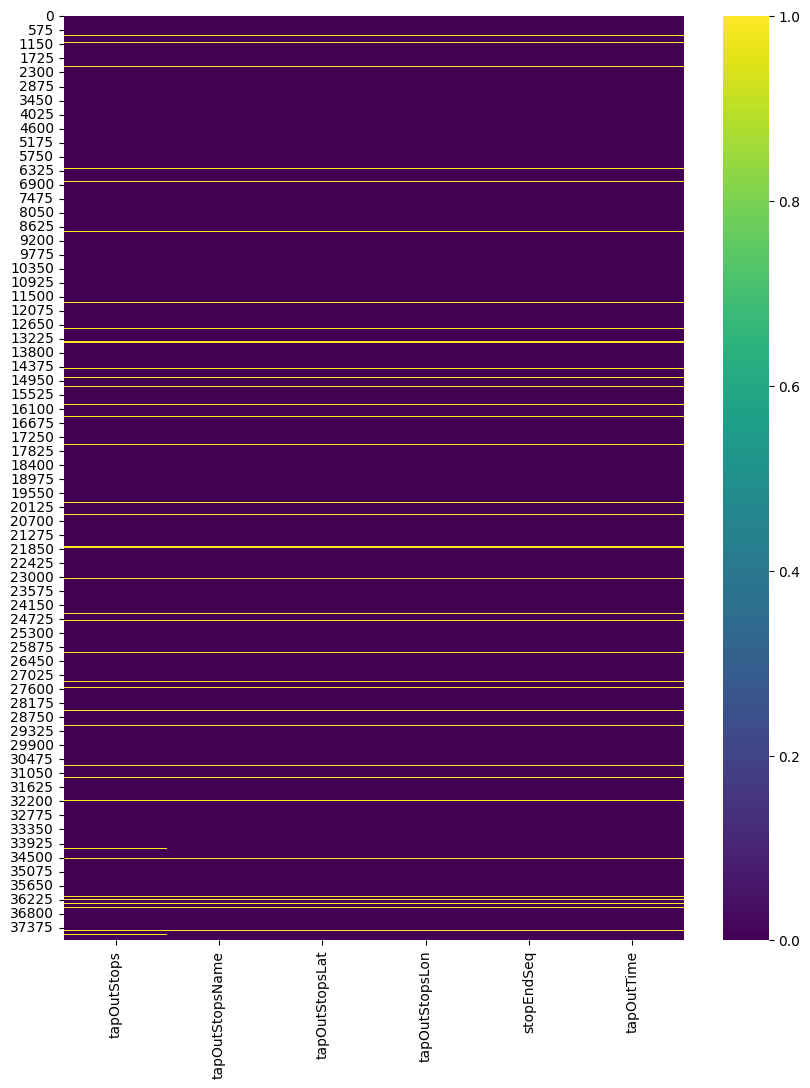

In [117]:
# Menggambarkan sebaran missing value pada kolom tapOutStops dan tapOutStopsName, tapOutStopsLat,tapOutStopsLon, stopEndSeq, dan tapOutTime
plt.figure(figsize=(10, 12))
sns.heatmap(df[['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq','tapOutTime' ]].isnull(), cmap='viridis')
plt.show()

- Berdasarkan heatmap sebaran missing value diatas, diketahui bahwa sebaran missing value di field selain tapOutStops adalah saling berhubungan.
- Menghapus data ini menjadi solusi yang masuk akal, mengingat belum ada metode yang tepat untuk mengisi nilai-nilai ini.
- Menjaga field ini agar tidak kosong menjadi penting untuk meminimalisir distorsi dalam distribusi data.

### Handing Missing Value `payAmount`

Untuk mengisi missing value pada field payAmount yang kosong, pada dasarnya dapat diisi menggunakan *domain knowledge*. Untuk memudahkan pengisian, pertama perlu dicek terlebih dahulu corridorID mana saja yang nilai payAmountnya kosong.

In [118]:
df[df['payAmount'].isna()]['corridorID'].value_counts()

corridorID
M7B        319
JAK.48A    251
M1H        174
JAK.48B    163
3H          92
9D           2
6D           2
6Q           1
B13          1
M3           1
6C           1
Name: count, dtype: int64

Berdasarkan domain knowledge, diketahui nilai payAmount untuk masing-masing koridor ID yang kosong, sebagai berikut:
- corridorID M7B, M1H, 6C, 9D, 6D, 6Q berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/peta-rute/) merupakan Layanan Non BRT dengan tarif Rp. 3500 
- corridorID 3H, M3 berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/peta-rute/) merupakan Layanan BRT dengan tarif Rp. 3500
- corridorID JAK.48A & JAK.48B berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/peta-rute/) dan laman [kompas](https://megapolitan.kompas.com/read/2023/12/08/02000031/rute-mikrotrans-jak48b-stasiun-tebet-kampung-melayu) serta [detik.com](https://news.detik.com/berita/d-6652665/menjajal-mikrotrans-jak48a-angkot-mewah-gratis-dengan-ac-dan-sliding-door) termasuk kategori Mikrotrans (Jaklingko) dengan tarif Rp. 0
- corridorID B13
  Berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/peta-rute/) bahwa untuk corridor jenis ini merupakan layanan Royaltrans dengan tarif: Rp. 20000



#### Mengisi nilai missing value pada field `payAmount` berdasarkan *domain knowledge*.

In [119]:
df.loc[df['corridorID'] == 'JAK.48A', 'payAmount'] = 0
df.loc[df['corridorID'] == 'JAK.48B', 'payAmount'] = 0
df.loc[df['corridorID'] == 'M7B', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'M1H', 'payAmount'] = 3500
df.loc[df['corridorID'] == '6C', 'payAmount'] = 3500
df.loc[df['corridorID'] == '9D', 'payAmount'] = 3500
df.loc[df['corridorID'] == '6D', 'payAmount'] = 3500
df.loc[df['corridorID'] == '6Q', 'payAmount'] = 3500
df.loc[df['corridorID'] == '3H', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'M3', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'B13', 'payAmount'] = 20000


In [120]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,transID,0,0.000
1,payCardID,0,0.000
2,payCardBank,0,0.000
3,payCardName,0,0.000
4,payCardSex,0,0.000
5,payCardBirthDate,0,0.000
6,corridorID,33,0.087
7,corridorName,33,0.087
8,direction,0,0.000
9,tapInStops,34,0.090


Setelah dilakukan handling missing value berdasarkan *domain knowledge*, untuk field `payAmount` sudah tidak ada lagi missing valuenya.
Selanjutnya dapat dilakukan drop untuk sisa missing value yang masih terdapat pada field `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` mengingat belum ada metode yang tepat untuk mengisi nilai-nilai tersebut.

- Berdasarkan heatmap sebaran missing value diatas, diketahui bahwa sebaran missing value di field selain tapOutStops adalah saling berhubungan.
- Menghapus data ini menjadi solusi yang masuk akal, mengingat belum ada metode yang tepat untuk mengisi nilai-nilai ini.
- Menjaga field ini agar tidak kosong menjadi penting untuk meminimalisir distorsi dalam distribusi data.

Untuk sisa kolom yang masih terdapat *missing value*, diperlukan melihat kembali apakah ada kesinambungan antar data berikut. Karena tidak ditemukannya hubungan antar kolom yang ada di dataset maka dilakukan drop untuk baris yang terdapat *missing value*.

In [121]:
# Menghapus sisa yang terdapat Missing Value
df_drop = ['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']
df.dropna(subset= df_drop, inplace= True)

In [122]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Data sudah clear dari *missing value*
.

## Delete Kolom `payCardName`

Kolom `payCardName` akan di drop karena dianggap anomali karena setelah dilihat datanya tidak ada kesinambungan dimana ada nama dengan gelar doktor tetapi tahun kelahirannya 2008, hal tersebut sangat tidak wajar maka dari itu kolom `payCardName` akan di drop.

In [123]:
# Drop kolom nama pengguna kartu karna tidak akan digunakan
df.drop('payCardName', axis=1, inplace=True)

## Cek Tipe Data

In [124]:
# Cek Tipe Data
df.dtypes

transID              object
payCardID             int64
payCardBank          object
payCardSex           object
payCardBirthDate      int64
corridorID           object
corridorName         object
direction           float64
tapInStops           object
tapInStopsName       object
tapInStopsLat       float64
tapInStopsLon       float64
stopStartSeq          int64
tapInTime            object
tapOutStops          object
tapOutStopsName      object
tapOutStopsLat      float64
tapOutStopsLon      float64
stopEndSeq          float64
tapOutTime           object
payAmount           float64
dtype: object

In [125]:
# Mengubah data type payAmount menjadi Integer, Mengubah Tipe Data untuk Tap In dan Tap Out time,
df['payAmount'] = df['payAmount'].astype('int64')
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

### Membuat kolom tap in&out Hour dan juga Day

In [126]:
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour
df['tapDay'] = df['tapInTime'].dt.dayofweek
df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,5,6,0
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,5,6,0
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,5,6,0
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,5,6,0
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,6,6,0


Karena nilai di kolom `tapDay` masih berupa angka, maka akan diisi berdasarkan harinya.

In [127]:
# mengisi value untuk kolom tapDay
df['tapDay'] = df['tapDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})
df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,5,6,Monday
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,5,6,Monday
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,5,6,Monday
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,5,6,Monday
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,6,6,Monday


### Selanjutnya membuat kolom `age` yang berisikan usia dari pengguna.

In [128]:
# Membuat kolom umur pengguna
df['age'] = 2023 - df['payCardBirthDate']
df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,age
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,5,6,Monday,15
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,5,6,Monday,26
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,5,6,Monday,31
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,5,6,Monday,45
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,6,6,Monday,41


### Berikutnya membuat kolom `ageGroup` yang berisikan kelompok umur pengguna.

Pengelompokan usia angkatan kerja di Indonesia mengacu pada Peraturan 
Menteri Tenaga Kerja Republik Indonesia Nomor 14 Tahun 2013 tentang Klasifikasi dan Pengelompokan Tenaga Kerja.
1. Usia 15-19 tahun: Kelompok ini termasuk dalam angkatan kerja muda. Biasanya mereka masih menempuh pendidikan atau baru memulai karir.
2. Usia 20-24 tahun: Kelompok ini merupakan usia produktif awal. Mereka umumnya sudah menyelesaikan pendidikan dan mulai bekerja secara penuh waktu.
3. Usia 25-34 tahun: Kelompok ini berada pada usia produktif puncak. Mereka biasanya sudah memiliki pengalaman kerja yang cukup dan mencapai posisi yang lebih tinggi di pekerjaan.
4. Usia 35-44 tahun: Kelompok ini masih dalam usia produktif, namun biasanya sudah mulai memikirkan masa pensiun.
5. Usia 45-64 tahun: Kelompok ini mendekati usia pensiun. Mereka biasanya memiliki banyak pengalaman dan keahlian yang berharga.

In [129]:
# Membuat kolom Age Group
def categorize_age(age):
    if age < 15:
        return 'Under 15'
    elif 15 <= age <= 19:
        return '15-19'
    elif 20 <= age <= 24:
        return '20-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    elif 45 <= age <= 64:
        return '45-64'
    else:
        return 'Elderly'

# Menerapkan fungsi untuk membuat kolom 'ageGroup'
df['ageGroup'] = df['age'].apply(categorize_age)
df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,age,ageGroup
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,5,6,Monday,15,15-19
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,5,6,Monday,26,25-34
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,5,6,Monday,31,25-34
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,5,6,Monday,45,45-64
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,6,6,Monday,41,35-44


In [130]:
# Membuat kolom baru untuk jenis Transjakarta yang digunakan
def determine_trans_type(payAmount):
    if payAmount == 20000:
        return 'RoyalTrans'
    elif payAmount == 3500:
        return 'Regular Tj'
    else:
        return 'Mikrotrans'

df['transType'] = df['payAmount'].apply(determine_trans_type)

df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,age,ageGroup,transType
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,106.85715,12.0,2023-04-03 06:00:53,3500,5,6,Monday,15,15-19,Regular Tj
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,106.81892,21.0,2023-04-03 06:40:01,3500,5,6,Monday,26,25-34,Regular Tj
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,106.81475,39.0,2023-04-03 06:50:55,3500,5,6,Monday,31,25-34,Regular Tj
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,106.93194,29.0,2023-04-03 06:28:16,3500,5,6,Monday,45,45-64,Regular Tj
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,106.81143,15.0,2023-04-03 06:57:03,3500,6,6,Monday,41,35-44,Regular Tj


In [131]:
df['payCardBank'].unique()

array(['emoney', 'dki', 'flazz', 'online', 'brizzi', 'bni'], dtype=object)

### Membuat kolom baru untuk payCardBank_group

In [132]:
def determine_carBank(payCardBank):
    if payCardBank == 'dki':
        return 'dki'
    elif payCardBank == 'emoney':
        return 'bank lain'
    elif payCardBank == 'flazz':
        return 'bank lain'
    elif payCardBank == 'brizzi':
        return 'bank lain'
    elif payCardBank == 'bni':
        return 'bank lain'
    else:
        return 'online'

In [133]:
df['parCardBank_group'] = df['payCardBank'].apply(determine_carBank)
df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,age,ageGroup,transType,parCardBank_group
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,12.0,2023-04-03 06:00:53,3500,5,6,Monday,15,15-19,Regular Tj,bank lain
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,21.0,2023-04-03 06:40:01,3500,5,6,Monday,26,25-34,Regular Tj,dki
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,39.0,2023-04-03 06:50:55,3500,5,6,Monday,31,25-34,Regular Tj,dki
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,29.0,2023-04-03 06:28:16,3500,5,6,Monday,45,45-64,Regular Tj,bank lain
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,15.0,2023-04-03 06:57:03,3500,6,6,Monday,41,35-44,Regular Tj,bank lain


Sebelum memulai analisis, kita harus melihat sebaran data atau outliers yang terdapat dalam data. Bertujuan mengetahui apakah data terdistribusi normal atau tidak.

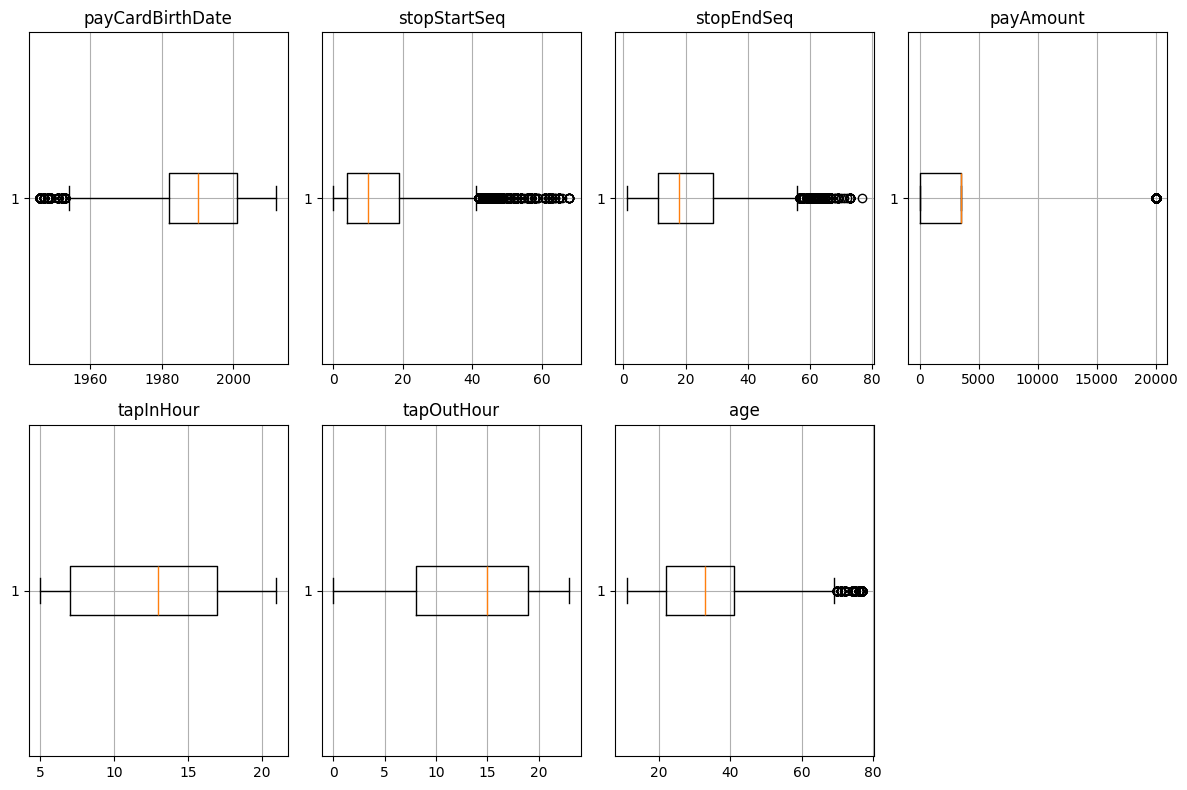

In [134]:
# Melihat sebaran data atau outliers
columnscheck = ['payCardBirthDate', 'stopStartSeq', 'stopEndSeq', 'payAmount', 'tapInHour', 'tapOutHour', 'age']

plt.figure(figsize=(12, 8))
for i, column in enumerate(columnscheck):
    plt.subplot(2, 4, i + 1)
    plt.boxplot(df[column], vert=False)
    plt.title(f'{column}')
    plt.grid()

plt.tight_layout()
plt.show()

Lalu melakukan *uji normalitas* dengan menggunakan **Kolmogorov-Smirnov Test** untuk menguji lebih detail apakah data terdistribusi normal atau tidak.

In [135]:
# Uji Normalitas
from scipy.stats import kstest

kolom_uji = ['payCardBirthDate','stopStartSeq','stopEndSeq','payAmount','tapInHour','tapOutHour','age']

list = []

for i in kolom_uji : 
    ks,pvalue = kstest((df[i]), 'norm')
    if pvalue> 0.05:
        list.append([i,round(pvalue,2), ' berdistribusi normal'])
    else :
        list.append([i,round(pvalue,2), 'berdistribusi tidak normal'])

print('Jika p-value < 0,05 maka data berdistribusi tidak normal')
print('Jika p-value > 0,05 maka data berdistribusi normal')
print(f'\n')
print('Hasil Uji Normalitas')
pd.DataFrame(list, columns =[['Nama kolom','p-value','Distribusi']])

Jika p-value < 0,05 maka data berdistribusi tidak normal
Jika p-value > 0,05 maka data berdistribusi normal


Hasil Uji Normalitas


,Nama kolom,p-value,Distribusi
0,payCardBirthDate,0.0,berdistribusi tidak normal
1,stopStartSeq,0.0,berdistribusi tidak normal
2,stopEndSeq,0.0,berdistribusi tidak normal
3,payAmount,0.0,berdistribusi tidak normal
4,tapInHour,0.0,berdistribusi tidak normal
5,tapOutHour,0.0,berdistribusi tidak normal
6,age,0.0,berdistribusi tidak normal


Kolom yang dilihat yaitu kolom-kolom yang berisikan nilai numerikal. Berdasarkan temuan diatas yang berupa boxplot dan uji normalitas Kolmogorov-Smirnov Test, disimpulkan bahwa data *tidak terdistribusi normal*.

Terakhir, export data yang sudah clean ke Excel.

In [136]:
# Export data clean ke excel
# df.to_excel('Transjakarta.xlsx', index=False)

# **Data Analysis**
---

In [137]:
# Mengubah unique value pada field direction
df['direction'] = df['direction'].replace({ 0: "Go", 1: "Back"})
df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,age,ageGroup,transType,parCardBank_group
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,Back,P00142,Pal Putih,...,12.0,2023-04-03 06:00:53,3500,5,6,Monday,15,15-19,Regular Tj,bank lain
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Go,B01963P,Kemenkes 2,...,21.0,2023-04-03 06:40:01,3500,5,6,Monday,26,25-34,Regular Tj,dki
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,Go,B00499P,Gg. Kunir II,...,39.0,2023-04-03 06:50:55,3500,5,6,Monday,31,25-34,Regular Tj,dki
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Go,B05587P,Taman Elok 1,...,29.0,2023-04-03 06:28:16,3500,5,6,Monday,45,45-64,Regular Tj,bank lain
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,Go,P00239,Sunter Boulevard Barat,...,15.0,2023-04-03 06:57:03,3500,6,6,Monday,41,35-44,Regular Tj,bank lain


Setelah dataset sudah clean dari *duplikasi, missing value, dan anomali*, kini masuk ke tahap analisis. Sesuai *problems dan goals*, analisis yang akan dibuat terbagi menjadi tiga segmen, yaitu **Pengguna Transjakarta, Tren Penggunaan Transjakarta dan Pola Perjalanan dan Rute**.

## **1. Pengguna Transjakarta**

Di segmen ini, saya akan menganalisis pengguna dan jenis pembayaran yang digunakan Transjakarta. Dari analisis ini diharapkan dapat mempertahankan dan menaikkan jumlah pengguna Transjakarta untuk waktu kedepannya serta bisa membantu Transjakarta dalam kerjasama dengan pihak yang membuat kartu transaksi yang nantinya dapat memberi profit untuk Transjakarta.

> ### Distribusi Pengguna Transjakarta Berdasarkan Gender

In [138]:
# Membuat variabel gender
gender = df.groupby('payCardSex')['payCardID'].nunique().reset_index()
gender

,payCardSex,payCardID
0,F,1055
1,M,925


In [139]:
# menghitung persentasi dari distribusi jenis kelamin
(df['payCardSex'].value_counts(normalize=True) * 100).round(2)

payCardSex
F    53.27
M    46.73
Name: proportion, dtype: float64

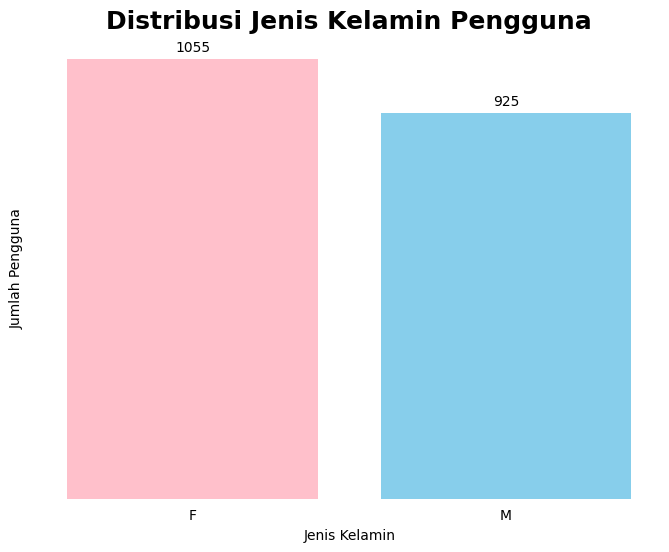

In [140]:
# Membuat Chart untuk Jenis Kelamin
labels = gender['payCardSex']
values = gender['payCardID']

colors = ['pink', 'skyblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Jenis Kelamin Pengguna', fontweight="bold", fontsize=18)
ax = plt.gca()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
# ax.set(xlabel=None)
# ax.set(ylabel=None)
sns.set_style()

for bar, v in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

Pengguna *Transjakarta* paling banyak berkelamin perempuan dengan **1055** pengguna.

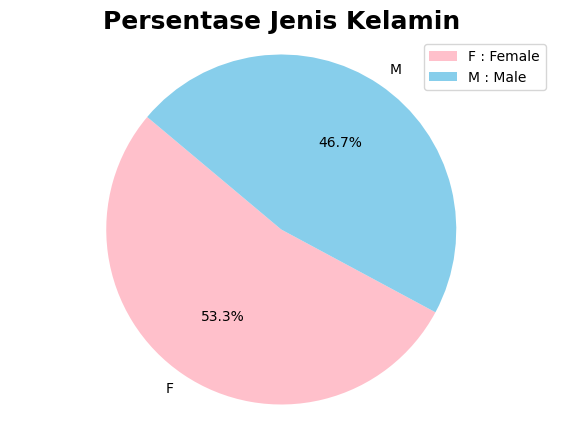

In [141]:
payCardSex_count = df['payCardSex'].value_counts()
labels = payCardSex_count.index
sizes = payCardSex_count.values

plt.figure(figsize=(7,5))
pie = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'])
plt.legend(pie[0], labels=['F : Female', 'M : Male'], loc='upper right')
plt.axis('equal')
plt.title('Persentase Jenis Kelamin', fontweight="bold", fontsize=18)
sns.set_style()
plt.show()

- Dari bar plot, terlihat bahwa distribusi penumpang wanita mendominasi dibandingkan pria, dengan perbedaan sebanyak 130 penumpang.
- Meskipun pada pie chart perbedaan proporsi antara pria dan wanita tidak terlalu signifikan, namun secara jumlah penumpang, wanita memiliki kelebihan sebanyak 130 orang, menunjukkan dampak yang cukup besar.

>### Distribusi Pengguna Transjakarta berdasarkan Usia

In [142]:
# Membuat variabel age distribution
ageDistribution = df.groupby('ageGroup')['payCardID'].nunique().reset_index()
ageDistribution

,ageGroup,payCardID
0,15-19,217
1,20-24,205
2,25-34,520
3,35-44,536
4,45-64,322
5,Elderly,28
6,Under 15,152


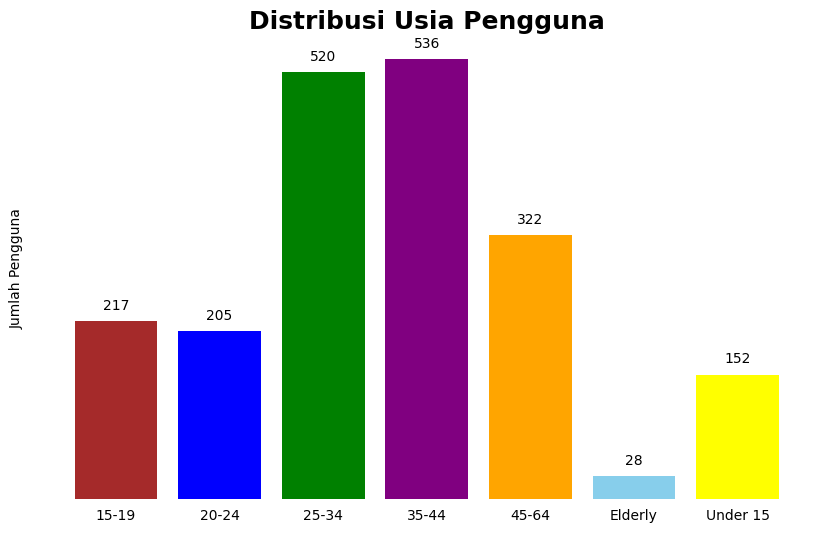

In [143]:
# Bar Chart Kelompok Usia Pengguna
labels = ageDistribution['ageGroup']
values = ageDistribution['payCardID']

colors = ['brown', 'blue', 'green', 'purple', 'orange', 'skyblue', 'yellow']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)
plt.xlabel('Usia Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Usia Pengguna', fontweight="bold", fontsize=18)
plt.xticks()
ax = plt.gca()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)
sns.set_style()

for bar, v in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

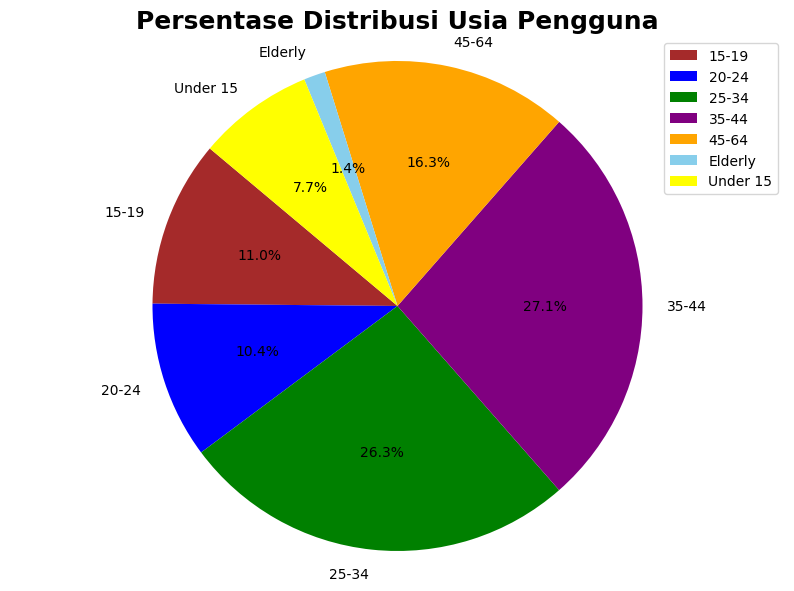

In [144]:
ageGroup_count =  df.groupby('ageGroup')['payCardID'].nunique()
labels = ageGroup_count.index
sizes = ageGroup_count.values
plt.figure(figsize=(10,7))
pie = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['brown', 'blue', 'green', 'purple', 'orange', 'skyblue', 'yellow'])
plt.legend(loc='upper right')
plt.axis('equal')
plt.title('Persentase Distribusi Usia Pengguna', fontweight="bold", fontsize=18)
plt.show()

Berdasarkan grafik-garifk diatas diketahui bahwa:
- Mayoritas pengguna Transjakarta pada bulan April 2023 berada dalam kategori usia 35-44 dan 25-34, mencapai 53% dari total transaksi yang dilakukan, setara dengan 1056 penumpang. 
- Ini disebabkan karna kategori usia tersebut merupakan Kelompok ini berada pada usia produktif puncak. Mereka biasanya sudah memiliki pengalaman kerja yang cukup dan mencapai posisi yang lebih tinggi di pekerjaan.sehingga mereka akan lebih sering menggunakan Transjakarta dibandingkan dengan kelompok usia yang lain.

## **2. Metode Pembayaran**

>### Distribusi Usia dan Gender pengguna terhadap Metode Pembayaran

In [145]:
# Mengetahui Jenis Kartu Yang Digunakan Untuk Pembayaran Transjakarta
payments = df.groupby('parCardBank_group')['payCardID'].nunique().reset_index().sort_values(by='payCardID', ascending=False)
payments

,parCardBank_group,payCardID
1,dki,970
0,bank lain,860
2,online,150


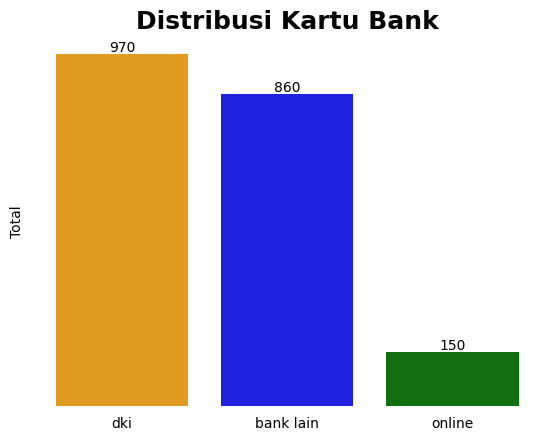

In [146]:
# Menampilkan Distribusi Kartu yang Digunakan Pembayaran Transjakarta
ax = sns.barplot(x='parCardBank_group', y='payCardID', data=payments, palette=['orange', 'blue', 'green'])

# Menampilkan teks di atas setiap bar
for i, v in enumerate(payments['payCardID']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('payCardBank')
plt.ylabel('Total')
plt.title('Distribusi Kartu Bank', fontweight="bold", fontsize=18)
ax = plt.gca()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)
sns.set_style()
plt.show()

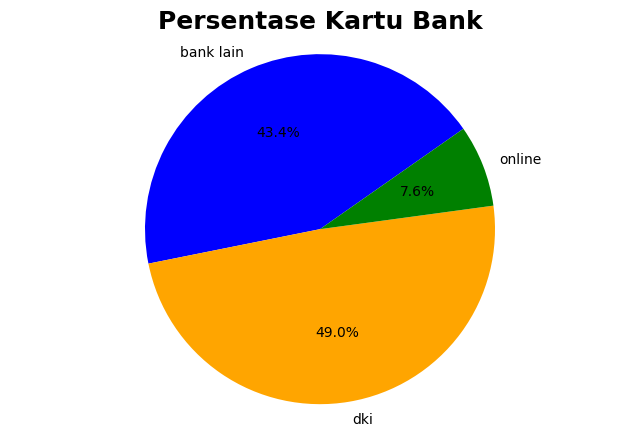

In [147]:
# Pie Chart
payment_counts = df.groupby('parCardBank_group')['payCardID'].nunique()
labels = payment_counts.index
sizes = payment_counts.values

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=35, colors=['blue', 'orange', 'green'])
plt.axis('equal')
plt.title('Persentase Kartu Bank', fontweight="bold", fontsize=18)
sns.set_style()
plt.show()


Dari grafik diatas, **kartu dki** adalah kartu yang digunakan terbanyak oleh pengguna *Transjakarta* dengan total angka yang digunakan sebanyak **970** dengan persentase 49 % dari total keseluruhan metode pembayaran

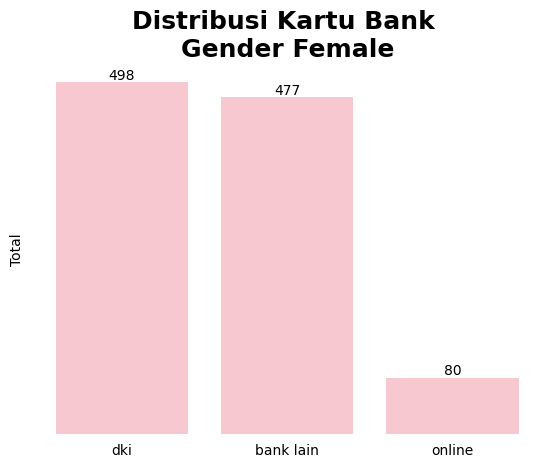

In [148]:
df_payCardBank_Gender = df.loc[df['payCardSex'] == 'F'].groupby(['payCardSex','parCardBank_group'])['payCardID'].nunique().reset_index().sort_values(by='payCardID', ascending=False)
df_payCardBank_Gender

ax = sns.barplot(df_payCardBank_Gender, x='parCardBank_group', y='payCardID', color='pink')
ax.bar_label(ax.containers[0])
plt.xlabel('payCardBank')
plt.ylabel('Total')
plt.title('Distribusi Kartu Bank \nGender Female', fontweight="bold", fontsize=18)
# plt.xticks(rotation=45)
ax = plt.gca()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)
sns.set_style()
plt.show()

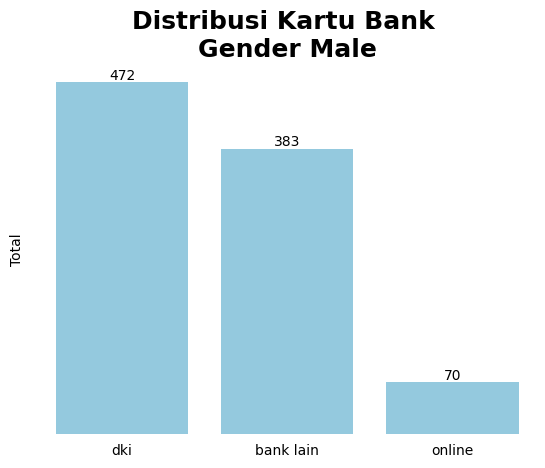

In [149]:
df_payCardBank_Gender = df.loc[df['payCardSex'] == 'M'].groupby(['payCardSex','parCardBank_group'])['payCardID'].nunique().reset_index().sort_values(by='payCardID', ascending=False)
df_payCardBank_Gender

ax = sns.barplot(df_payCardBank_Gender, x='parCardBank_group', y='payCardID', color='skyblue')
ax.bar_label(ax.containers[0])
plt.xlabel('payCardBank')
plt.ylabel('Total')
plt.title('Distribusi Kartu Bank \nGender Male', fontweight="bold", fontsize=18)
# plt.xticks(rotation=45)
ax = plt.gca()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)
sns.set_style()
plt.show()

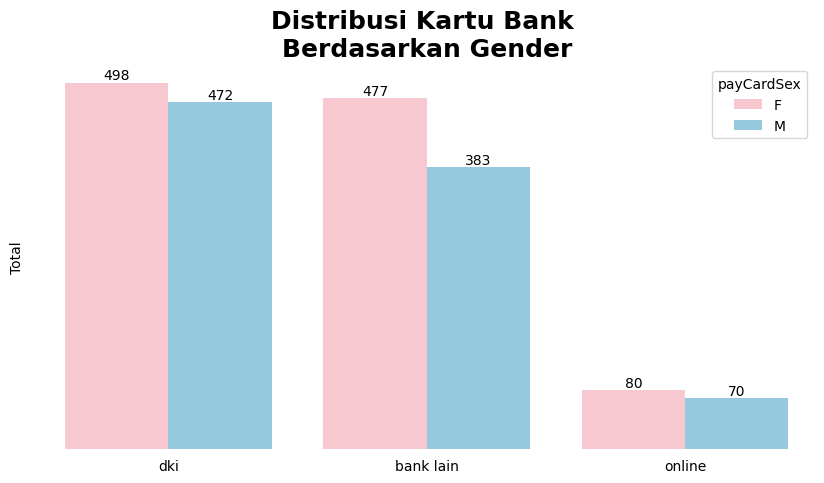

In [150]:
df_payCardBank_Gender = df.groupby(['payCardSex','parCardBank_group'])['payCardID'].nunique().reset_index().sort_values(by='payCardID', ascending=False)
df_payCardBank_Gender

plt.figure(figsize=(10,5))
ax = sns.barplot(df_payCardBank_Gender, x='parCardBank_group', y='payCardID', hue='payCardSex', palette=['pink', 'skyblue'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('payCardBank')
plt.ylabel('Total')
plt.title('Distribusi Kartu Bank \nBerdasarkan Gender', fontweight="bold", fontsize=18)
# plt.xticks(rotation=45)
ax = plt.gca()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)
sns.set_style()
plt.show()

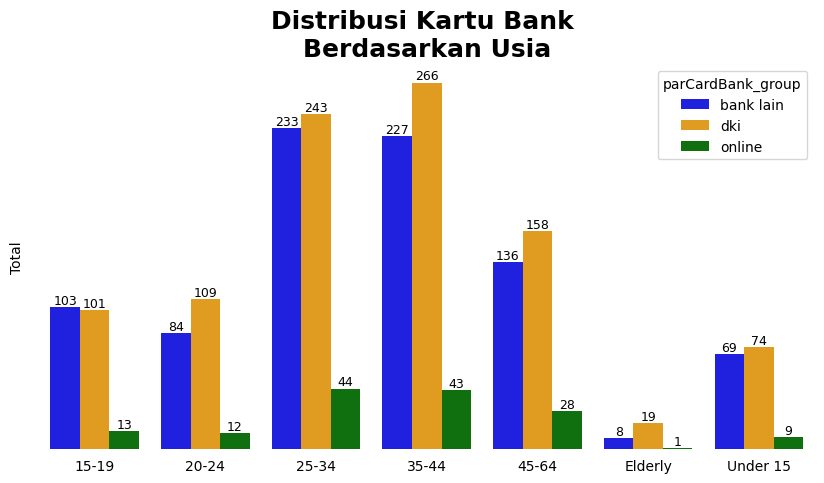

In [151]:
df_payCardBank_age = df.groupby(['ageGroup', 'parCardBank_group'])['payCardID'].nunique().reset_index()
df_payCardBank_age

plt.figure(figsize=(10,5))
ax = sns.barplot(df_payCardBank_age, x='ageGroup', y='payCardID', hue='parCardBank_group', palette=['blue', 'orange', 'green'])
ax.bar_label(ax.containers[0], fontsize=9)
ax.bar_label(ax.containers[1], fontsize=9)
ax.bar_label(ax.containers[2], fontsize=9)
plt.xlabel('Usia Pengguna')
plt.ylabel('Total')
plt.title('Distribusi Kartu Bank \nBerdasarkan Usia', fontweight="bold", fontsize=18)
# plt.xticks(rotation=45)
ax = plt.gca()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)
sns.set_style()
plt.show()

Berdasarkan grafik-grafik diatas diketahui bahwa:
- Mayoritas pengguna memilih **kartu dki** sebagai metode pembayaran transjakarta dengan total pengguna sebanyak **970** dengan persentase 49 % dari total keseluruhan metode pembayaran
- Distribusi metode pembayaran didominasi oleh kelompok usia 35-44.
- Baik di gender perempuan atau laki-laki kartu dki tetap menjadi metode pembayaran yang paling banyak digunakan yakni mencapai
498 pengguna perempuan dan 472 untuk laki-laki
- Diketahui bahwa peminat dki paling banyak hal ini dikarenakan banyak nya keuntungan yang didapat seperti kemudahan, promosi dan terintegrasi
- Dalam rangka mewujudkan misi Transjakarta: `Bersama-sama menyediakan layanan transportasi terintegrasi yang memudahkan dan membahagiakan kehhidupan Jakarta`, kedepannya aplikasi ini dapat lebih diperhatikan agar dapat lebih diminati oleh pengguna.

> ### Jenis Transjakarta yang Digunakan Oleh Pengguna Kartu DKI

Disini akan dibuat variabel baru untuk mengetahui jenis transjakarta apa yang digunakan oleh pengguna kartu dki. Kenapa hanya pengguna kartu dki saja karena dari segmen *payment* diketahui kartu yang paling banyak digunakan adalah dki yang berikutnya akan dijadikan sebuah rekomendasi Transjakarta untuk berkerja sama dengan dki

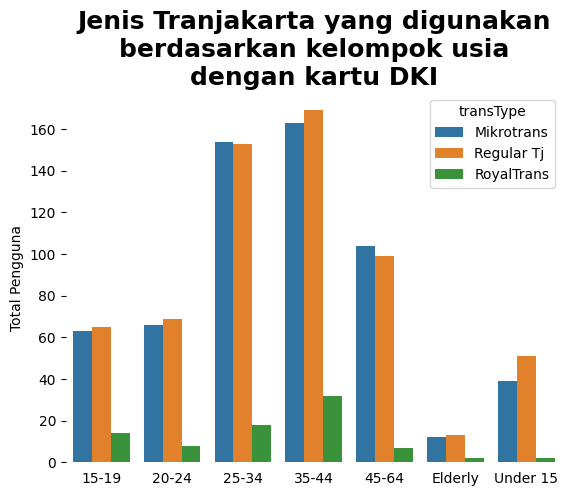

In [152]:
transType_ageGroup = df.loc[df['parCardBank_group'] == 'dki'].groupby(['transType', 'ageGroup'])['payCardID'].nunique().reset_index()
transType_ageGroup
sns.barplot(transType_ageGroup, x='ageGroup', y='payCardID', hue='transType')
plt.xlabel('payCardBank')
plt.ylabel('Total Pengguna')
plt.title('Jenis Tranjakarta yang digunakan\nberdasarkan kelompok usia\ndengan kartu DKI', fontweight="bold", fontsize=18)
# plt.xticks(rotation=45)
ax = plt.gca()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
# ax.set(yticklabels=[])
ax.tick_params(bottom=False)
# ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)
sns.set_style()
plt.show()

Dari grafik diatas, Reguler Transjakarta paling banyak digunakan untuk perjalanan kelompok umur **35-44** tahun dengan kartu dki.

## **3. Tren Penggunaan Transjakarta**

>### Pola penggunaan Transjakarta dalam rentang waktu satu bulan

In [153]:
df['tapInDate'] = df['tapInTime'].dt.strftime('%d')

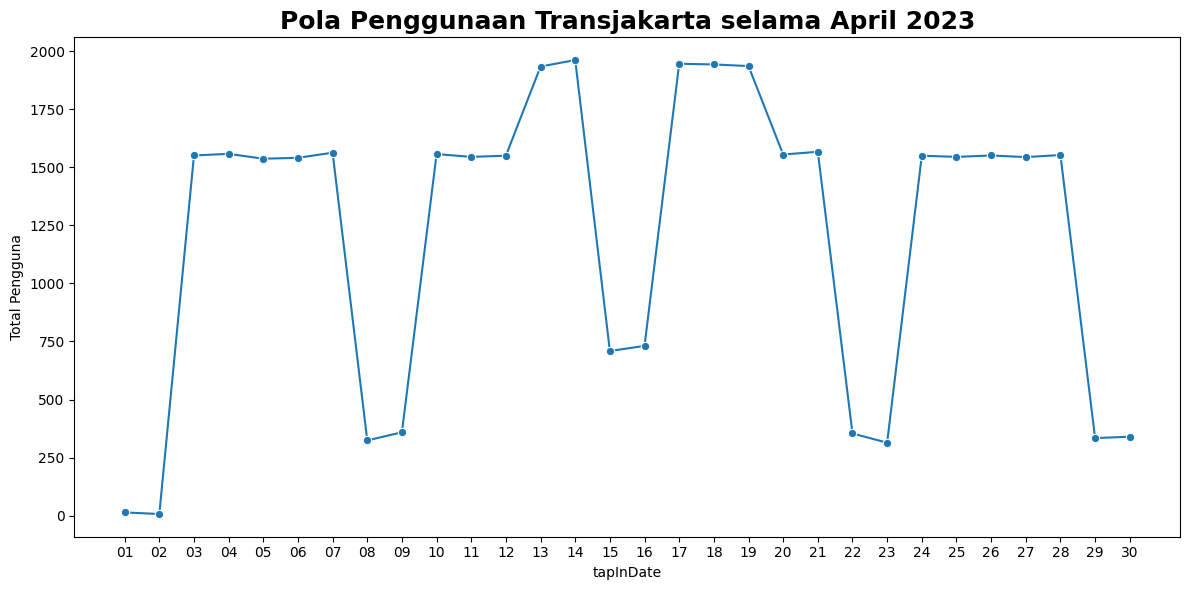

In [154]:
passenger_count = df.groupby('tapInDate').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=passenger_count.index, y=passenger_count.values, marker='o')
plt.ylabel('Total Pengguna')
plt.title('Pola Penggunaan Transjakarta selama April 2023', fontweight="bold", fontsize=18)
plt.tight_layout()
plt.grid(False)

plt.show()

- Terlihat ada pola kenaikan selama rentang 5 hari dan penurunan 2 hari setelahnya. Ini merujuk pada hari kerja dan akhir pekan. 5 hari yang naik merupakan hari kerja, dan 2 hari yang menurun merupakan akhir pekan.
- Pengguna Transjakarta lebih sering menggunakan Transjakarta saat hari kerja, bisa diasumsikan untuk pergi bekerja, sekolah atau hal lainnya.
- Saat libur Lebaran pada tanggal 22 dan 23 yang kebetulan pada hari akhir pekan, juga mencerminkan tren penurunan dalam penggunaan layanan tersebut. 
- Terdapat jumlah penumpang yang menggunakan transjakarta dikisaran 300-700 penumpang perhari pada saat akhir pekan. 

>### Distribusi penggunaan Transjakarta pada jam-jam tertentu sepanjang hari
       Apakah ada pola perbedaan antara hari kerja dan akhir pekan?

In [155]:
df_weekday = df[df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
cross_weekday = pd.crosstab(df_weekday['tapDay'], df_weekday['tapInHour'])
cross_weekday


tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
tapDay,,,,,,,,,,,,,,,,,
Friday,619,1084,483,527,513,23,29,23,26,1,34,621,1002,413,441,428,378
Monday,600,1107,524,502,489,14,26,16,35,1,26,600,1008,419,441,430,366
Thursday,621,1070,485,512,503,20,27,21,26,3,37,598,986,451,406,409,399
Tuesday,591,1092,525,494,496,16,26,28,20,2,28,593,1014,416,415,440,395
Wednesday,592,1077,478,514,517,28,26,31,17,1,31,611,1017,429,435,389,381


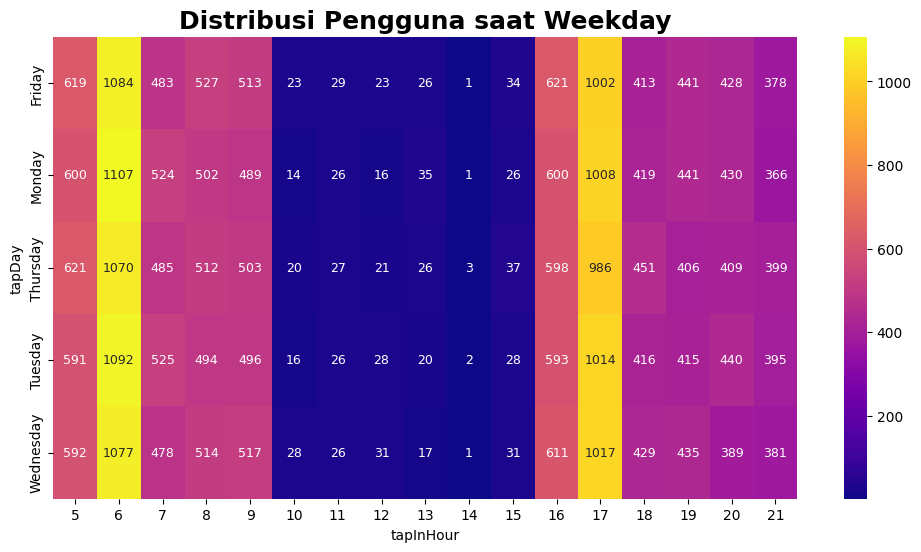

In [156]:
plt.figure(figsize=(12,6))
sns.heatmap(cross_weekday, annot=True, 
            annot_kws={'size':9}, fmt='.0f',
            cmap='plasma')
plt.title('Distribusi Pengguna saat Weekday', fontweight="bold", fontsize=18)
plt.show()

Berdasarkan visualisasi heatmap diatas, diketahui bahwa:
- Puncak Penggunaan terjadi pada Jam Berangkat dan Pulang Kerja:
  Pada hari kerja, terjadi peningkatan signifikan dalam penggunaan Transjakarta pada jam berangkat kerja (05:00 - 09:00) dan pulang kerja (16:00 - 21:00).
- Penggunaan menurun di jam 10:00 - 15:00 kemungkinan karena sebagian besar orang sudah berada di tempat kerja pada saat itu.
- Variasi dalam penggunaan pada jam 10:00 - 15:00, mungkin karena aktivitas masyarakat yang beragam, seperti rapat, perjalanan bisnis, atau urusan pribadi.
- Penggunaan Transjakarta cenderung konsisten setiap hari kerja, dengan perbedaan yang relatif kecil antara hari Senin hingga Jumat.

In [157]:
df_weekend = df[df['tapDay'].isin(['Saturday', 'Sunday'])]
cross_weekend = pd.crosstab(df_weekend['tapDay'], df_weekend['tapInHour'])
cross_weekend

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
tapDay,,,,,,,,,,,,,,,,,
Saturday,110,91,91,116,103,88,91,109,99,79,116,111,138,106,109,103,75
Sunday,101,98,107,114,93,98,102,99,115,80,114,101,116,98,117,127,71


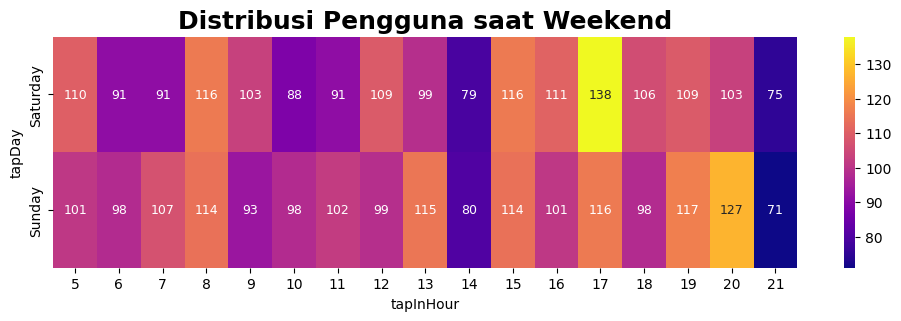

In [158]:
plt.figure(figsize=(12,3))
sns.heatmap(cross_weekend, annot=True, 
            annot_kws={'size':9}, fmt='.0f',
            cmap='plasma')
plt.title('Distribusi Pengguna saat Weekend', fontweight="bold", fontsize=18)
plt.show()

Berdasarkan heatmap diatas, diketahui bahwa:
- Peningkatan Penggunaan di awal sore hingga malam hari: <br>
Pada akhir pekan, terjadi peningkatan penggunaan Transjakarta pada jam-jam sore hingga malam hari (15:00 - 20:00). Ini mungkin disebabkan oleh kegiatan sosial, rekreasi, atau perjalanan keluar pada akhir pekan.

## **4. Koridor dan Rute Perjalanan**

> ### Distribusi perjalanan pengguna pada koridor tertentu pada saat peak hour

Hal pertama yang akan dilakukan adalah menentukan pembagian peak hour berdasarkan informasi yang kita peroleh sebelumnya pada pola penggunaan Transjkarta. Diketahui peak hour terjadi pada jam 05:00 - 09:00 dipagi hari dengan peak time di jam 6 pagi. Kemudian pada jam 16:00 - 21:00 di sore hingga malam hari dengan peak time di jam 17 sore.

In [159]:
def peak_time_weekday(x):
    if 5 <= x <= 9:
        return 'Morning Peak Hour'
    elif 16 <= x <= 21:
        return 'Evening Peak Hour'
    else:
        return 'Non Peak Hour'
    
df['peak_hour'] = df['tapInHour'].apply(peak_time_weekday)

In [160]:
df.head(5)

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,payAmount,tapInHour,tapOutHour,tapDay,age,ageGroup,transType,parCardBank_group,tapInDate,peak_hour
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,Back,P00142,Pal Putih,...,3500,5,6,Monday,15,15-19,Regular Tj,bank lain,03,Morning Peak Hour
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Go,B01963P,Kemenkes 2,...,3500,5,6,Monday,26,25-34,Regular Tj,dki,03,Morning Peak Hour
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,Go,B00499P,Gg. Kunir II,...,3500,5,6,Monday,31,25-34,Regular Tj,dki,03,Morning Peak Hour
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Go,B05587P,Taman Elok 1,...,3500,5,6,Monday,45,45-64,Regular Tj,bank lain,03,Morning Peak Hour
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,Go,P00239,Sunter Boulevard Barat,...,3500,6,6,Monday,41,35-44,Regular Tj,bank lain,03,Morning Peak Hour


> Morning Peak Time in Weekday

In [161]:
weekday_morning = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour")]

df_weekday_morning = weekday_morning.groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
df_weekday_morning = df_weekday_morning.sort_values(by='Count', ascending=False).head(10)

df_weekday_morning


,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,189
214,S21,Ciputat - CSW,177
119,JAK.06,Kampung Rambutan - Pondok Gede,160
195,JIS3,Harmoni - Jakarta International Stadium,158
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,158
92,8C,Kebayoran Lama - Tanah Abang,154
44,2E,Rusun Rawa Bebek - Kodamar,143
162,JAK.42,Kampung Melayu - Pondok Kelapa,140
100,9D,Pasar Minggu - Tanah Abang,139
15,11Q,Kampung Melayu - Pulo Gebang via BKT,138


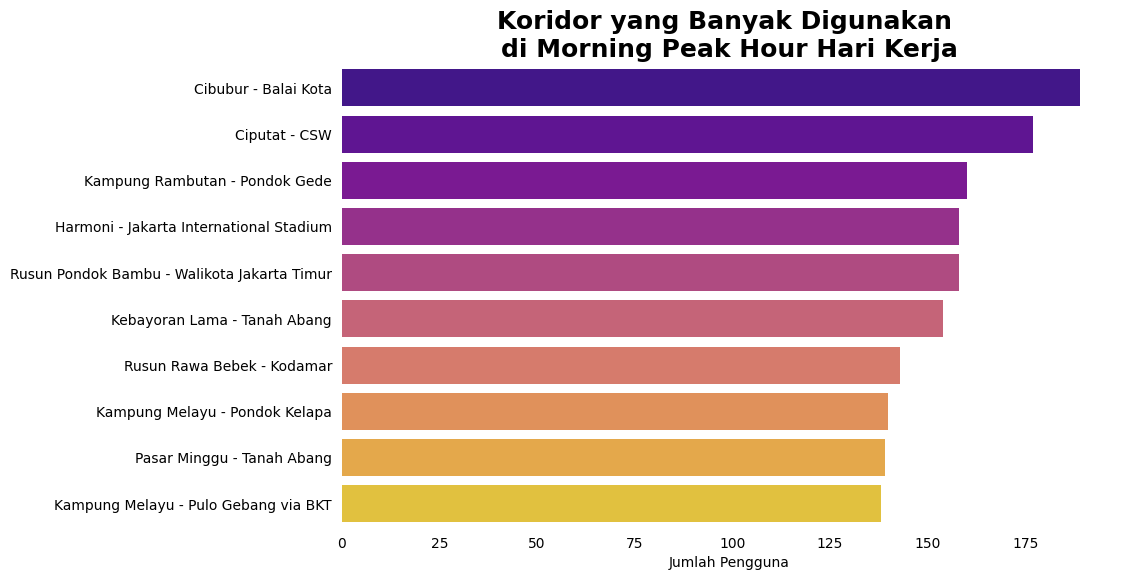

In [162]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_weekday_morning, y='corridorName', x='Count', palette='plasma')
# ax.bar_label(ax.containers)
plt.title('Koridor yang Banyak Digunakan \ndi Morning Peak Hour Hari Kerja', fontweight="bold", fontsize=18)
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Corridor Name')
sns.set_style()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
# ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
# ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [163]:
# Corridor Tersibuk dengan Card Bank yang dipakai
weekday_morning_1T = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour") & (df['corridorID'] == '1T')]
df_weekday_morning_1T = weekday_morning_1T.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_morning_1T)
print('\n')
weekday_morning_S21 = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour") & (df['corridorID'] == 'S21')]
df_weekday_morning_S21 = weekday_morning_S21.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_morning_S21)
print('\n')
weekday_morning_JAK06 = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour") & (df['corridorID'] == 'JAK.06')]
df_weekday_morning_JAK06 = weekday_morning_JAK06.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_morning_JAK06)
print('\n')
weekday_morning_JIS3 = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour") & (df['corridorID'] == 'JIS3')]
df_weekday_morning_JIS3 = weekday_morning_JIS3.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_morning_JIS3)
print('\n')
weekday_morning_11P = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour") & (df['corridorID'] == '11P')]
df_weekday_morning_11P = weekday_morning_11P.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_morning_11P)
print('\n')
weekday_morning_8C = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour") & (df['corridorID'] == '8C')]
df_weekday_morning_8C = weekday_morning_8C.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_morning_8C)
print('\n')
weekday_morning_2E = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour") & (df['corridorID'] == '2E')]
df_weekday_morning_2E = weekday_morning_2E.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_morning_2E)
print('\n')
weekday_morning_JAK42 = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour") & (df['corridorID'] == 'JAK.42')]
df_weekday_morning_JAK42 = weekday_morning_JAK42.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_morning_JAK42)
print('\n')
weekday_morning_9D = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour") & (df['corridorID'] == '9D')]
df_weekday_morning_9D = weekday_morning_9D.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_morning_9D)
print('\n')
weekday_morning_11Q = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Morning Peak Hour") & (df['corridorID'] == '11Q')]
df_weekday_morning_11Q = weekday_morning_11Q.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_morning_11Q)

           corridorName parCardBank_group  count
0  Cibubur - Balai Kota               dki     97
1  Cibubur - Balai Kota         bank lain     92


    corridorName parCardBank_group  count
0  Ciputat - CSW         bank lain     99
1  Ciputat - CSW               dki     58
2  Ciputat - CSW            online     20


                     corridorName parCardBank_group  count
0  Kampung Rambutan - Pondok Gede               dki    115
1  Kampung Rambutan - Pondok Gede         bank lain     45


                              corridorName parCardBank_group  count
0  Harmoni - Jakarta International Stadium         bank lain     80
1  Harmoni - Jakarta International Stadium               dki     78


                                  corridorName parCardBank_group  count
0  Rusun Pondok Bambu - Walikota Jakarta Timur               dki    117
1  Rusun Pondok Bambu - Walikota Jakarta Timur         bank lain     39
2  Rusun Pondok Bambu - Walikota Jakarta Timur            online      2


      

> Evening Peak Time in Weekday

In [164]:
weekday_evening = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour")]

df_weekday_evening = weekday_evening.groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
df_weekday_evening = df_weekday_evening.sort_values(by='Count', ascending=False).head(10)

df_weekday_evening

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,190
214,S21,Ciputat - CSW,180
119,JAK.06,Kampung Rambutan - Pondok Gede,162
195,JIS3,Harmoni - Jakarta International Stadium,160
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,158
92,8C,Kebayoran Lama - Tanah Abang,156
208,M7B,BKN - Blok M,145
44,2E,Rusun Rawa Bebek - Kodamar,144
100,9D,Pasar Minggu - Tanah Abang,143
76,6N,Ragunan - Blok M via Kemang,141


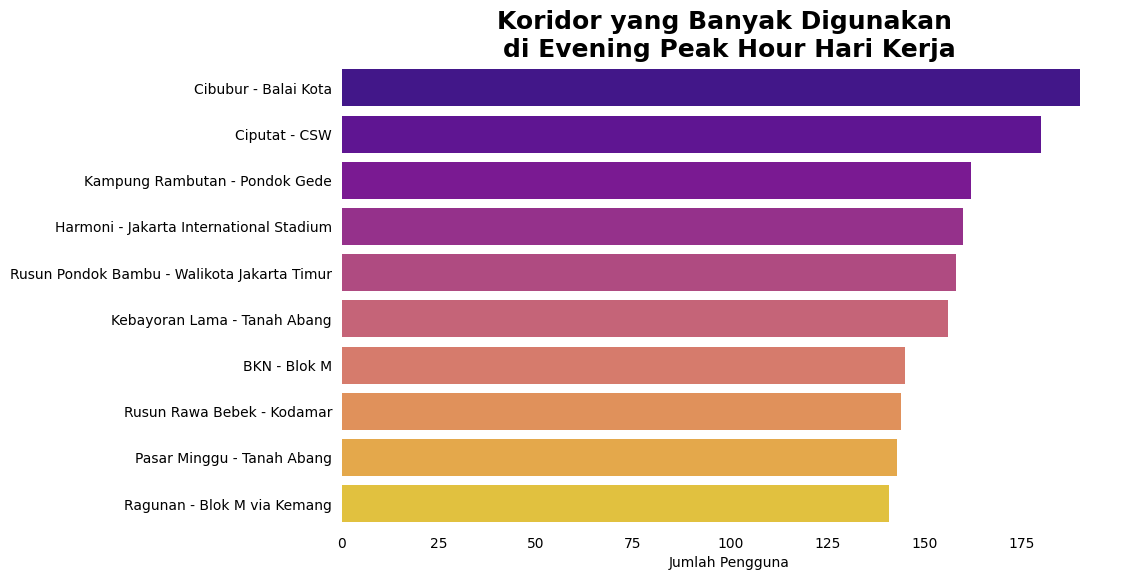

In [165]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_weekday_evening, y='corridorName', x='Count', order=df_weekday_evening['corridorName'].value_counts().index, palette='plasma')
plt.title('Koridor yang Banyak Digunakan \ndi Evening Peak Hour Hari Kerja', fontweight="bold", fontsize=18)
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Corridor Name')
sns.set_style()
ax = plt.gca()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
# ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
# ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [166]:
# Corridor Tersibuk dengan Card Bank yang dipakai
weekday_evening_1T = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour") & (df['corridorID'] == '1T')]
df_weekday_evening_1T = weekday_evening_1T.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_evening_1T)
print('\n')
weekday_evening_S21 = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour") & (df['corridorID'] == 'S21')]
df_weekday_evening_S21 = weekday_evening_S21.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_evening_S21)
print('\n')
weekday_evening_JAK06 = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour") & (df['corridorID'] == 'JAK.06')]
df_weekday_evening_JAK06 = weekday_evening_JAK06.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_evening_JAK06)
print('\n')
weekday_evening_JIS3 = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour") & (df['corridorID'] == 'JIS3')]
df_weekday_evening_JIS3 = weekday_evening_JIS3.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_evening_JIS3)
print('\n')
weekday_evening_11P = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour") & (df['corridorID'] == '11P')]
df_weekday_evening_11P = weekday_evening_11P.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_evening_11P)
print('\n')
weekday_evening_8C = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour") & (df['corridorID'] == '8C')]
df_weekday_evening_8C = weekday_evening_8C.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_evening_8C)
print('\n')
weekday_evening_M7B = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour") & (df['corridorID'] == 'M7B')]
df_weekday_evening_M7B = weekday_evening_M7B.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_evening_M7B)
print('\n')
weekday_evening_2E = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour") & (df['corridorID'] == '2E')]
df_weekday_evening_2E = weekday_evening_2E.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_evening_2E)
print('\n')
weekday_evening_9D = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour") & (df['corridorID'] == '9D')]
df_weekday_evening_9D = weekday_evening_9D.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_evening_9D)
print('\n')
weekday_evening_6N = df[(df['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hour'] == "Evening Peak Hour") & (df['corridorID'] == '6N')]
df_weekday_evening_6N = weekday_evening_6N.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekday_evening_6N)

           corridorName parCardBank_group  count
0  Cibubur - Balai Kota               dki     98
1  Cibubur - Balai Kota         bank lain     92


    corridorName parCardBank_group  count
0  Ciputat - CSW         bank lain    104
1  Ciputat - CSW               dki     57
2  Ciputat - CSW            online     19


                     corridorName parCardBank_group  count
0  Kampung Rambutan - Pondok Gede               dki    120
1  Kampung Rambutan - Pondok Gede         bank lain     42


                              corridorName parCardBank_group  count
0  Harmoni - Jakarta International Stadium         bank lain     82
1  Harmoni - Jakarta International Stadium               dki     78


                                  corridorName parCardBank_group  count
0  Rusun Pondok Bambu - Walikota Jakarta Timur               dki    118
1  Rusun Pondok Bambu - Walikota Jakarta Timur         bank lain     40


                   corridorName parCardBank_group  count
0  Kebayoran Lama - T

In [167]:
weekend_card = df[(df['tapDay'].isin(['Saturday', 'Sunday']))]

df_weekend_card = weekend_card.groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
df_weekend_card = df_weekend_card.sort_values(by='Count', ascending=False).head(10)

df_weekend_card

,corridorID,corridorName,Count
140,JAK.19,Pinang Ranti - Kampung Rambutan,33
133,JAK.120,JIS - Terminal Muara Angke,32
100,9C,Pinang Ranti - Bundaran Senayan,31
43,2B,Harapan Indah - ASMI,30
13,11N,Rusun Cipinang Muara - Jatinegara,28
179,JAK.58,Cilincing - Rorotan,27
158,JAK.37,Cililitan - Condet via Kayu Manis,26
88,7F,Kampung Rambutan - Juanda via Pasar Baru,25
101,9D,Pasar Minggu - Tanah Abang,25
128,JAK.113,Rusun Sindang Koja - Kp. Sawah,24


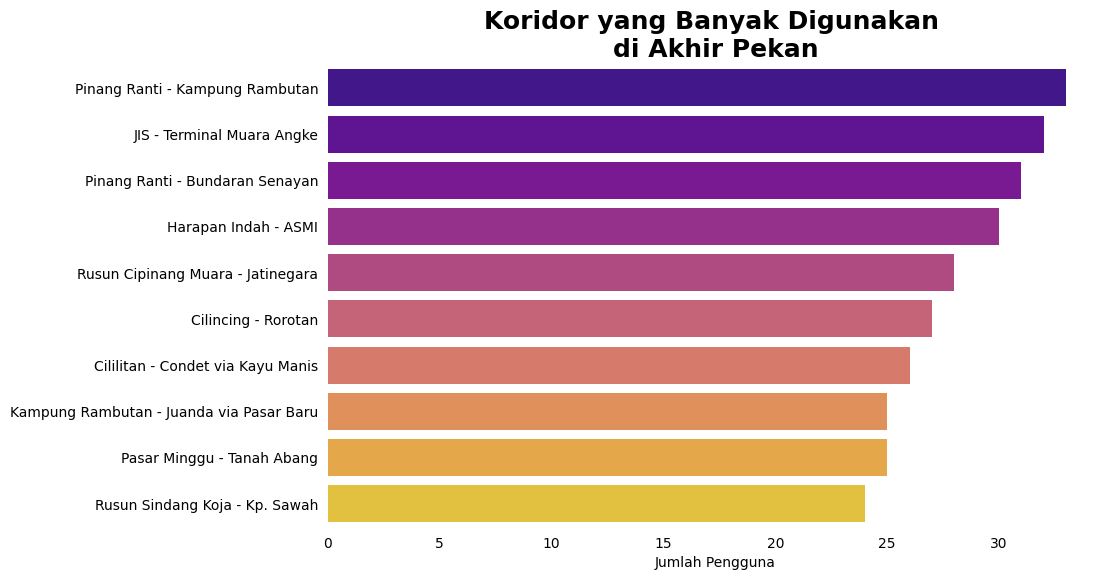

In [168]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_weekend_card, y='corridorName', x='Count', order=df_weekend_card['corridorName'].value_counts().index, palette='plasma')
plt.title('Koridor yang Banyak Digunakan \ndi Akhir Pekan', fontweight="bold", fontsize=18)
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Corridor Name')
sns.set_style()
ax = plt.gca()
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.yticks(fontsize=12)
# ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
# ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [169]:
# Corridor Tersibuk dengan Card Bank yang dipakai
weekend_evening_JAK19 = df[(df['tapDay'].isin(['Saturday', 'Sunday'])) & (df['corridorID'] == 'JAK.19')]
df_weekend_evening_JAK19 = weekend_evening_JAK19.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekend_evening_JAK19)
print('\n')
weekend_evening_JAK120 = df[(df['tapDay'].isin(['Saturday', 'Sunday'])) & (df['corridorID'] == 'JAK.120')]
df_weekend_evening_JAK120 = weekend_evening_JAK120.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekend_evening_JAK120)
print('\n')
weekend_evening_9C = df[(df['tapDay'].isin(['Saturday', 'Sunday'])) & (df['corridorID'] == 'JAK.06')]
df_weekend_evening_9C = weekend_evening_9C.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekend_evening_9C)
print('\n')
weekend_evening_2B = df[(df['tapDay'].isin(['Saturday', 'Sunday'])) & (df['corridorID'] == '2B')]
df_weekend_evening_2B = weekend_evening_2B.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekend_evening_2B)
print('\n')
weekend_evening_11N = df[(df['tapDay'].isin(['Saturday', 'Sunday'])) & (df['corridorID'] == '11N')]
df_weekend_evening_11N = weekend_evening_11N.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekend_evening_11N)
print('\n')
weekend_evening_JAK58 = df[(df['tapDay'].isin(['Saturday', 'Sunday'])) & (df['corridorID'] == 'JAK.58')]
df_weekend_evening_JAK58 = weekend_evening_JAK58.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekend_evening_JAK58)
print('\n')
weekend_evening_JAK37 = df[(df['tapDay'].isin(['Saturday', 'Sunday'])) & (df['corridorID'] == 'JAK.37')]
df_weekend_evening_JAK37 = weekend_evening_JAK37.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekend_evening_JAK37)
print('\n')
weekend_evening_7F = df[(df['tapDay'].isin(['Saturday', 'Sunday'])) & (df['corridorID'] == '7F')]
df_weekend_evening_7F = weekend_evening_7F.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekend_evening_7F)
print('\n')
weekend_evening_9D = df[(df['tapDay'].isin(['Saturday', 'Sunday'])) & (df['corridorID'] == '9D')]
df_weekend_evening_9D = weekend_evening_9D.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekend_evening_9D)
print('\n')
weekend_evening_JAK113 = df[(df['tapDay'].isin(['Saturday', 'Sunday'])) & (df['corridorID'] == 'JAK.113')]
df_weekend_evening_JAK113 = weekend_evening_JAK113.groupby(['corridorName'])[['parCardBank_group']].value_counts().to_frame().reset_index()
print(df_weekend_evening_JAK113)

                      corridorName parCardBank_group  count
0  Pinang Ranti - Kampung Rambutan         bank lain     22
1  Pinang Ranti - Kampung Rambutan               dki     11


                 corridorName parCardBank_group  count
0  JIS - Terminal Muara Angke               dki     15
1  JIS - Terminal Muara Angke         bank lain      9
2  JIS - Terminal Muara Angke            online      8


                     corridorName parCardBank_group  count
0  Kampung Rambutan - Pondok Gede         bank lain      7
1  Kampung Rambutan - Pondok Gede               dki      5
2  Kampung Rambutan - Pondok Gede            online      1


           corridorName parCardBank_group  count
0  Harapan Indah - ASMI               dki     16
1  Harapan Indah - ASMI            online     10
2  Harapan Indah - ASMI         bank lain      4


                        corridorName parCardBank_group  count
0  Rusun Cipinang Muara - Jatinegara               dki     21
1  Rusun Cipinang Muara - Jatinegara

Berdasarkan grafik-grafik diatas diketahui bahwa: 

- Koridor cibubur - balaikota (ID : 1T) merupakan koridor dengan tingkat penggunaan paling tinggi saat hari kerja baik saat morning ataupun evening peak-hour didikuti diikuti 9 koridor lainnya dengan persebaran yang cukup merata
- dalam koridor tersibuk hari kerja ini kartu DKI masih yang cukup dominan urutan pertama di 6-7 koridor dalam menjadi alat metode pemmabayran. namun ada 3-4 koridor yang dimana bank lain lebih dominan. Sedangkan pembayaran online menjadi yang paling sedikit digunakan dan hanya digunakan di 3-5 koridor saja
- Koridor Pinang Ranti - Kampung Rambutan (ID : JAK.19) merupakan koridor dengan tingkat penggunaan paling tinggi saat akhir pekan didikuti diikuti 9 koridor lainnya dengan persebaran yang cukup merata
- dalam koridor tersibuk akhir pekan ini kartu DKI menempati posisi pertama di 4 koridor saja dalam menjadi alat metode pemmabayran. Sedangkan ada 6 koridor lainnya yang dimana bank lain lebih dominan. Sedangkan pembayaran online menjadi yang paling sedikit digunakan dan hanya digunakan di 8 koridor saja

# **Kesimpulan dan Rekomendasi**
---

Berdasarkan analisis yang telah dilakukan pada dataset Transjakarta bulan April 2023, terdapat beberapa kesimpulan dan rekomendasi yang dapat diberikan kepada Transjakarta untuk meningkatkan efektivitas, efisiensi, dan profitabilitas operasinya:

## **Kesimpulan**

**1. Pengguna Transjakarta**
- Mayoritas pengguna transjakarta adalah perempuan sebesar 53,35% (1055 Pengguna), sementara laki-laki menyumbang 46,65% (925 Pengguna)

- Mayoritas pengguna usia pengguna transjakarta adalah usia 35 -44 tahun yakni sebesar 27,1 % kemudian diikuti usia 25-34 tahun sebesar 26,3 % diketahui bahwa keduanya
merupakan kelompok kerja dengan tingkat produktif puncak. Dan kelompok usia yang paling sedikit adalah usia 64 tahun keatas hal ini wajar menngingat kelompok usia ini adalah lansia yang sudah tidak banyak melakukan kegiatan

**2. Metode Pembayaran**
- Kartu DKI adalah kartu yang paling banyak digunakan oleh pengguna Transjakarta baik perempuan dan laki-laki memiliki jumlah yang hampir sama, dengan persentase sebesar 49 % (970 Pengguna). Bank lain sebesar 43,4% (860 Pengguna). Bank DKI selaku penerbit Kartu DKI yang juga Bank Daerah dari Provinsi DKI Jakarta, tentunya sudah memberi kemudahan untuk pengguna Transjakarta dalam bertransaksi, dari hal tersebut wajar jika Kartu DKI sebagai kartu yang paling banyak digunakan. Diketahui berdasarkan informasi bahwa Bank DKI meluncurkan 2 kartu yakni jaklingko dan jakartacard. 2 kartu juga merupakan yang paling banyak digunakan sebagai metode pembayaran diberbagai transportasi umum seperti MRT, LRT, Trasnjakarta.

- Metode pembayaran online merupakan yang paling sedikit yakni sebesar 7.6%. Berdasarkan informasi yang ada diketahui bahwa online yang dimaksud adalah dari aplikasi tije yang diluncurkan sejak 2021. hal ini dikarenakan banyak nya masalah yang dialami pengguna oleh karena nya mendapatkan rating 1.7 di playstore. permasalahannya antara lain : lamanya ketika membuka aplikasi, pencarian rute terbaik dan sibuk diaplikasi seringnya mengalami kendala dan tidak update real time dan masih banyak permasalahan lainnya. 

- Kartu DKI juga selain praktis terdapat banyak promo menarik yang ditawarkan sehingga banyak pengguna memilih kartu ini

- Mayoritas usia pengguna kartu adalah usia 25-44 Tahun yakni sebesar 500 an pengguna. dan yang paling sedikit usia 64 keatas hal ini karena lansia sudah jarang melakukan aktivitas
- Mayoritas pengguna memilih regular transjakarta sebagai pilihan namun jika dilihat proporsi regular transjakarta dan mikrotrans hampir sama. Bahkan di kelompok usia 25-34 dan 45 - 64 mikrotrans memiliki proporsi yang lebih banyak. Royal trans memiliki proporsi yang paling sedikit.


**3. Tren Penggunanaan Transjakarta**
- Pengguna Transjakarta lebih sering menggunakan Transjakarta saat hari kerja dengan perbedaan yang relatif kecil setiap harinya, dengan puncak banyaknya pengguna pada jam kerja (05.00 - 09.00) dan pulang kerja (16.00 - 21.00) 
- Saat akhir pekan penggunaan transjakarta cukup merata di setiap jamnya 

**4. Koridor Tersibuk**
- Koridor cibubur - balaikota (ID : 1T) merupakan koridor dengan tingkat penggunaan paling tinggi saat hari kerja baik saat morning ataupun evening peak-hour didikuti diikuti 9 koridor lainnya dengan persebaran yang cukup merata
- dalam koridor tersibuk hari kerja ini kartu DKI masih yang cukup dominan urutan pertama di 6-7 koridor dalam menjadi alat metode pemmabayran. namun ada 3-4 koridor yang dimana bank lain lebih dominan. Sedangkan pembayaran online menjadi yang paling sedikit digunakan dan hanya digunakan di 3-5 koridor saja
- Koridor Pinang Ranti - Kampung Rambutan (ID : JAK.19) merupakan koridor dengan tingkat penggunaan paling tinggi saat akhir pekan didikuti diikuti 9 koridor lainnya dengan persebaran yang cukup merata
- dalam koridor tersibuk akhir pekan ini kartu DKI menempati posisi pertama di 4 koridor saja dalam menjadi alat metode pemmabayran. Sedangkan ada 6 koridor lainnya yang dimana bank lain lebih dominan. Sedangkan pembayaran online menjadi yang paling sedikit digunakan dan hanya digunakan di 8 koridor saja


## **Rekomendasi**

1. **Meningkatkan Pemanfaatan Kartu DKI:** Direkomendasikan untuk mengintensifkan promosi Kartu DKI sebagai metode pembayaran yang efektif. Dengan meluncurkan strategi loyalitas pelanggan, seperti diskon atau penghargaan khusus untuk pengguna setia, Transjakarta dapat mendorong pengguna untuk lebih sering menggunakan Kartu DKI utamanya di jam-jam sibuk dihari kerja. terlebih lagi untuk koridor yang penggunaan kartu DKI nya diurutan kedua atau bahkan tidak ada.

2. **Meniadakan Pembayaran Online:** Dengan tahu bahwa pembayaran ini paling sedikit digunakan dan masih banyak nya koridor yang tidak menggunakannya dipertimbangkan untuk dihapus. Dan fokus untuk peningkatan profit melalui kartu DKI yang sudah sangat dominan digunakan.

2. **Program Khusus untuk Kelompok Usia 25-44 Tahun:** Dengan memahami bahwa kelompok usia ini adalah salah satu segmen pengguna yang paling aktif, disarankan penyelenggaraan promosi atau program khusus yang dapat menarik lebih banyak pelanggan dari kelompok usia ini. Program-program ini bisa termasuk diskon khusus atau insentif lainnya.

3. **Perbaikan Layanan di Koridor Cibubur - Balai Kota:** Koridor Cibubur - Balai Kota merupakan salah satu koridor yang paling banyak digunakan. Direkomendasikan fokus pada perawatan dan pelayanan yang optimal di koridor ini untuk meningkatkan pengalaman pengguna. Hal ini dapat mencakup pemeliharaan armada yang baik, pengurangan waktu tunggu, dan perbaikan fasilitas halte. Karena masih banyaknya masalah yang terjadi seperti kapasitas bus yang tidak memadai saat jam-jam sibuk, kurangnya fasilitas di halte dan tindakan kriminalitas di malam hari

4. **Peningkatan Frekuensi Layanan:** Selama jam-jam sibuk, direkomendasikan pertimbangan peningkatan frekuensi layanan atau penambahan armada. akan membantu mengurangi kepadatan dan memastikan pengalaman perjalanan yang lebih nyaman bagi pengguna.

Dengan menerapkan rekomendasi-rekomendasi ini, diharapkan Transjakarta dapat mengoptimalkan layanannya dan memenuhi kebutuhan pengguna dengan lebih baik, yang kedepannya akan mendukung **efektivitas, efisiensi, dan profit** operasional Transjakarta sebagai transportasi publik.

In [170]:
# # Export data clean ke excel
# df.to_excel('Transjakarta.xlsx', index=False)